K-Nearest Neighbour or KNN is a supervised algorithm used for both regression and classfication. It is based on the assumption that similar objects are nearer to each other. KNN takes __k__ as parameter. KNN fails in higher dimensions _(curse of dimensionality)_. 

We will be using it for solving classification problems. 

__Outlines of the algorithm__:

- Consider a training set and test set as input data.
- For each __test_point__ in test set:
  - Calculate the distance (we have used __euclidean distance__) from all the points in training set.
  - Store the distances obtained in a list and sort it in ascending order. 
  - Now, consider the first __k__ entries of the sorted list. 
  - The parameter __k__ defines the total number of nearest neighbours (in training set) of the point in test set. 
  - Since, it is supervised algorithm, the training test will be labelled in advance. 
  - Among the __k nearest neighbours__ of the __test point__ we will choose (or vote) the _label_ with highest frequency. 
    - Eg. consider a test point __p__, and we have chosen k=3 nearest neighbours. If the training set is labelled into two sets with labels 0 and 1, then, for __p__, suppose its neighbours has labels {0,1,1}. Since _label 1_ has highest frequency, __p__ will be labelled 1.
  - The __test point__ is labelled.
- In the end of the for loop, a final labelled dictionary will be returned for the points in test set. 

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import statistics
%matplotlib inline

In [2]:
class KNN:
    
    def __init__(self, train, test, k):
        self.train = train
        self.test = test
        self.k = k
        self.col_dict = {0:'purple', 1:'green', 2:'yellow', 
                         3:'pink', 4:'red'}
        
    def fit(self):
        
        #stores the labels of the test set after the completion of the algorithm 
        final_label_dict = {}
        #stores the labelled training datapoints 
        label_dict = {} 
        
        #the dataset is generated by make_blobs function; the labels of the data is
        #stored in y array
        for i in range(len(self.train)):
            label_dict[tuple(self.train[i])] = y[i]
    
        for test_point in test_set:
            dist_list = []
            dist_dict = {}
    
            #dist_dict stores the training points and their corresponding distances
            #from the point in the test set
            for datapoint in self.train:
                dist = np.linalg.norm(test_point-datapoint)
                dist_dict[tuple(datapoint)] = dist
        
            #we are storing the calculated distances separately in the dist_list
            for _, d in dist_dict.items():
                dist_list.append(d)
            
            #dist_list is sorted and updated with the first k elements
            dist_list.sort()
            dist_list = dist_list[:self.k]
    
            #picking the k nearest neighbours from the training set and storing in 
            #point_list
            point_list = []
    
            for d in dist_list:
        
                for point, dist in dist_dict.items():
                    if d == dist:
                        point_list.append(point)
                
            #trying to find the labels of the nearest neighbours
            label_list = []
            for p in point_list:
                for point, label in label_dict.items():
                    if point == p:
                        label_list.append(label)
                
            #the mode function under the statistics library returns the label with 
            #highest frequency
            assigned_label = statistics.mode(label_list)
    
            #the final_dict is updated with the testing points and their new labels
            final_label_dict[tuple(test_point)] = assigned_label
        
        return final_label_dict, label_dict
    
    
    def show(self):
        temp_train = []
        temp_test = []
        final_label_dict, label_dict = self.fit()
    
        #the temp_train and temp_test stores the labels of the training set and test set
        #for plotting purpose
        for _, label in label_dict.items():
            temp_train.append(label)
    
        for _, label in final_label_dict.items():
            temp_test.append(label)

        for i in range(len(self.train)):
            plt.scatter(self.train[i][0], self.train[i][1], color=self.col_dict[temp_train[i]])

        for i in range(len(self.test)):
            plt.scatter(self.test[i][0], self.test[i][1], color=self.col_dict[temp_test[i]],
               marker = 'x', s=500)
    

In [3]:
#training set
np.random.seed(240)
x, y = make_blobs(n_samples=1000, centers=2)

In [4]:
#test set
np.random.seed(100)
test_set, _ = make_blobs(n_samples=50, centers=1)

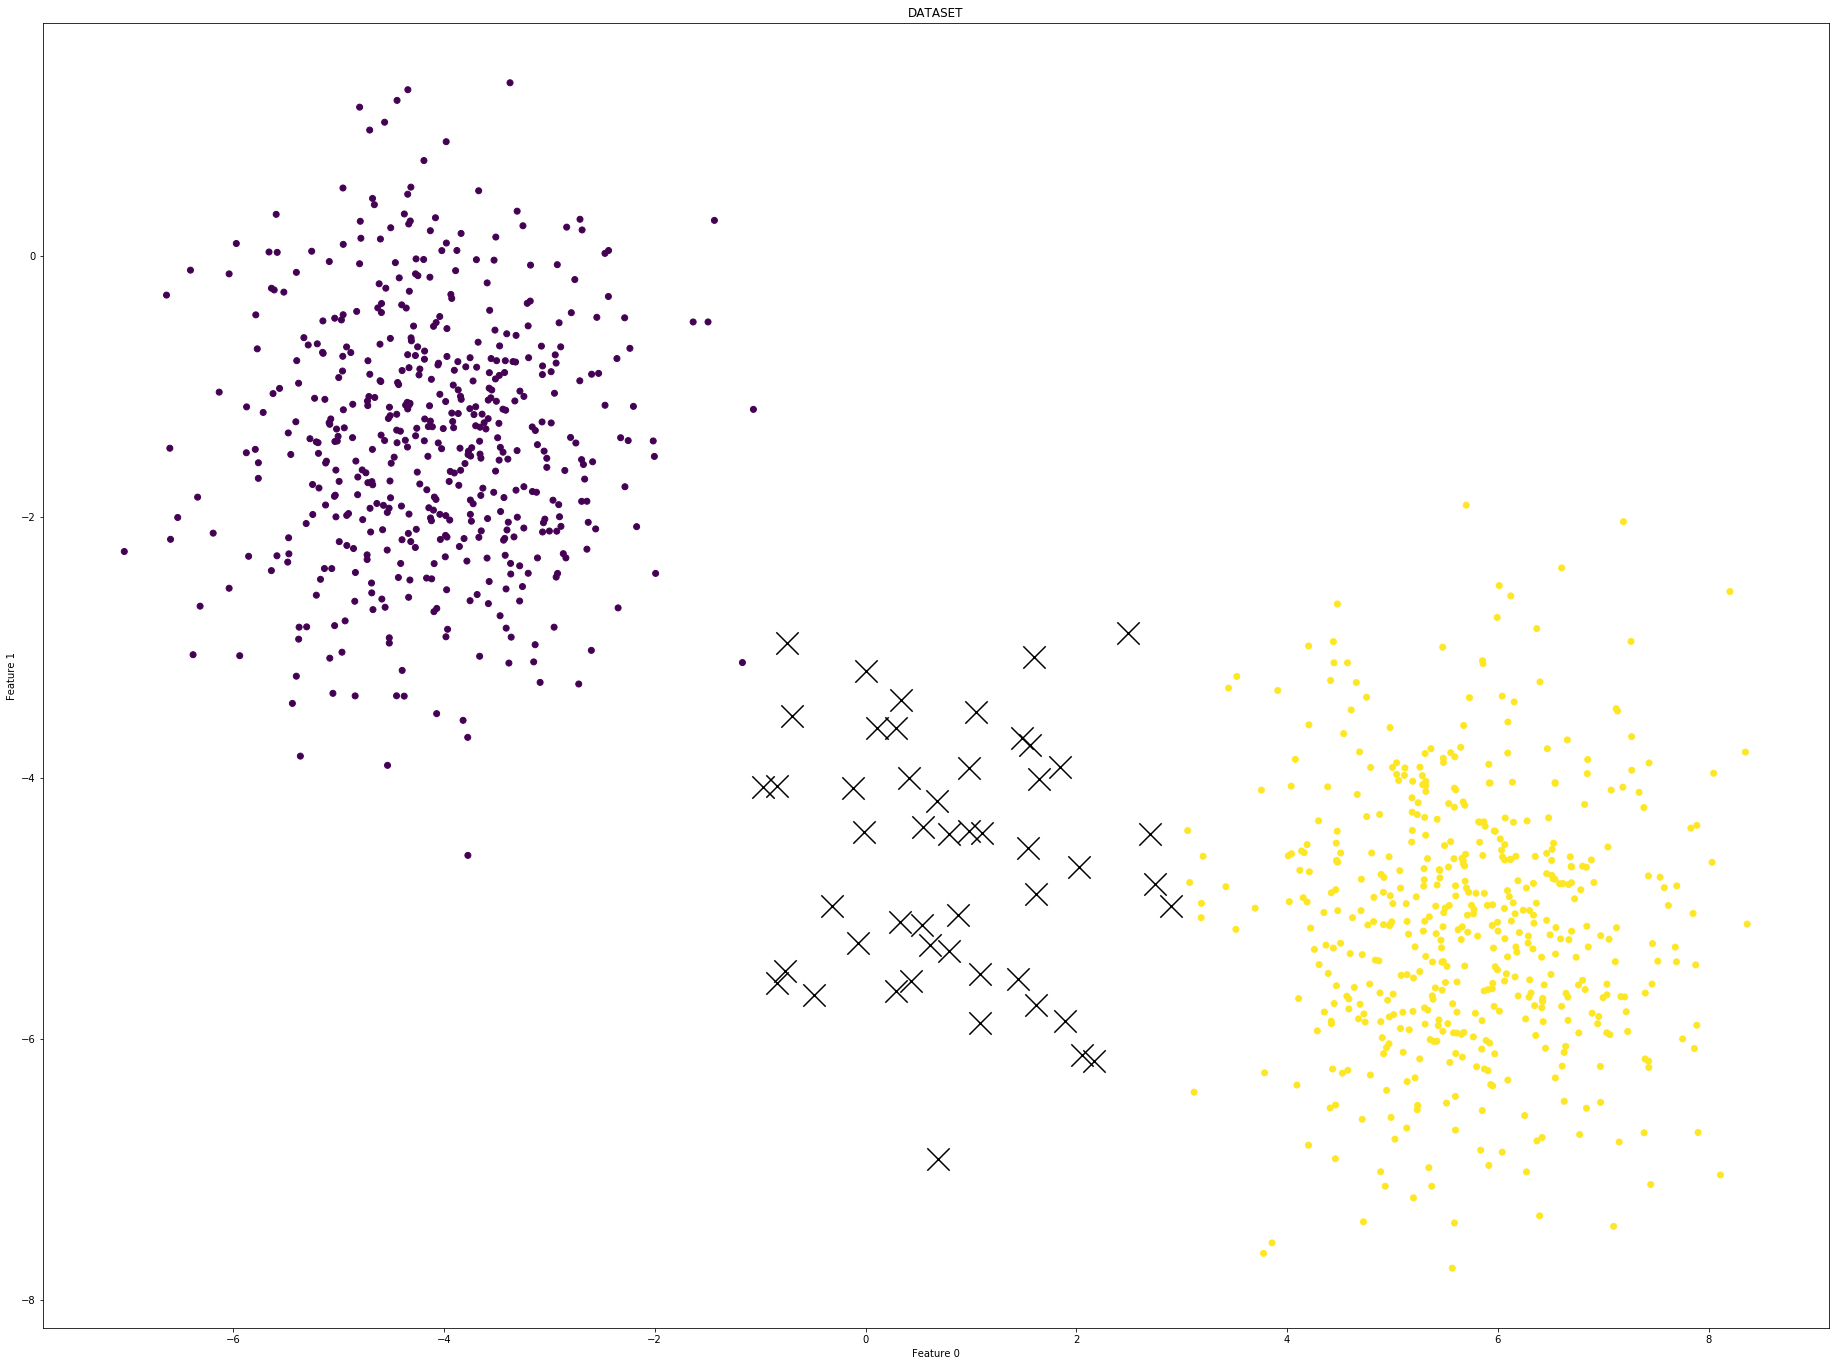

In [5]:
#Original dataset
fig = plt.figure(figsize = (32, 24))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('DATASET')
plt.scatter(x[:,0], x[:,1], c=y)
plt.scatter(test_set[:,0], test_set[:,1], c='black', marker='x', s=500)

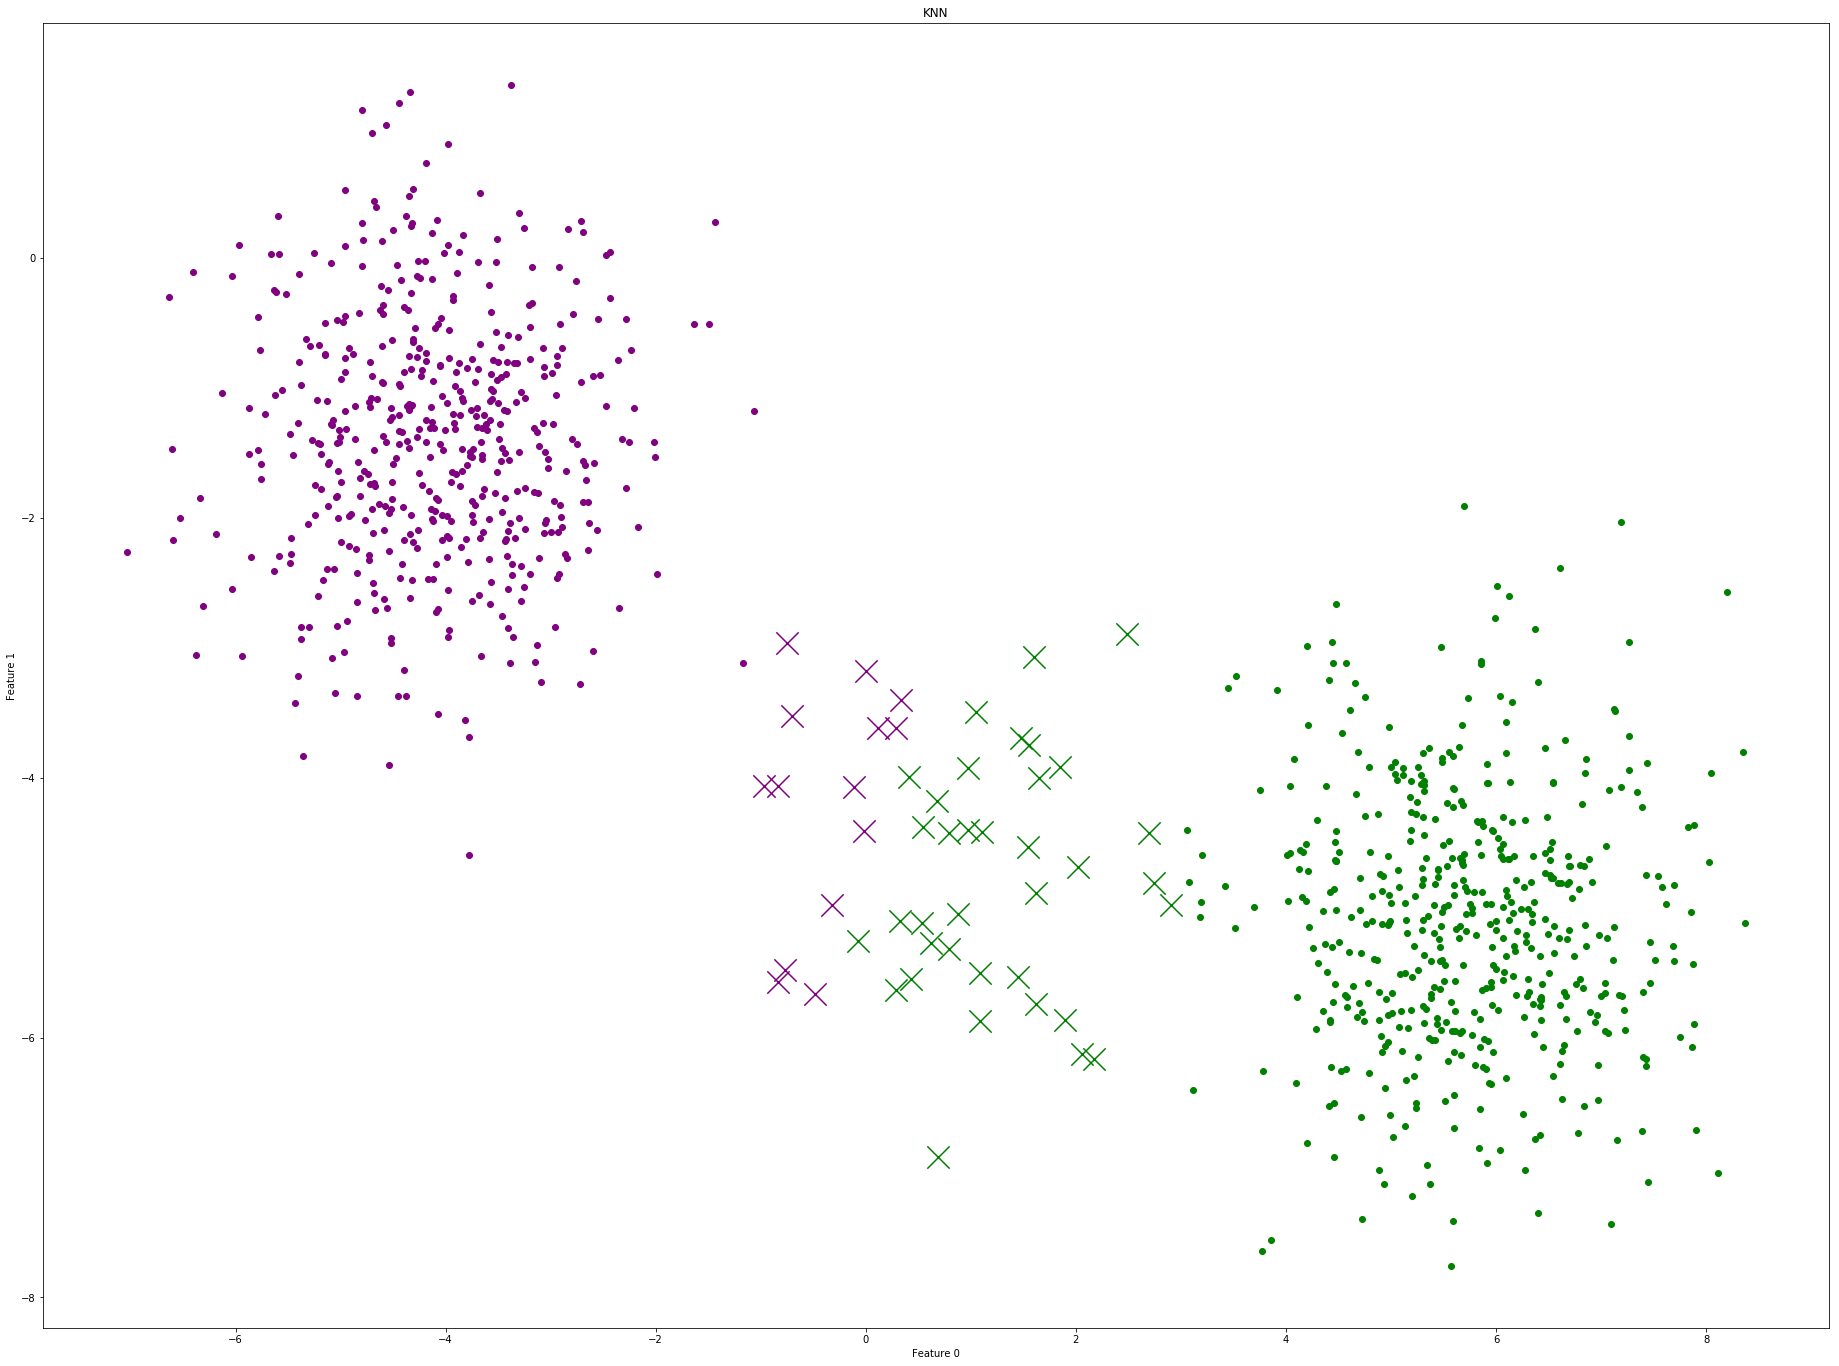

In [6]:
#Dataset after KNN is executed
knn = KNN(x, test_set, k=3)
fig = plt.figure(figsize = (32, 24))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('KNN')
knn.show()